In [1]:
import numpy as np
import pandas as pd

In [17]:
pd.set_option('display.max_rows', 10)              # REMOVELINE 
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [18]:
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,George H. W. Bush,Republican,10,27,18,19,20,27,13,...,21,20,29,28,19,26,10,17,21,21
41,42,Bill Clinton,Democratic,21,12,39,8,11,17,3,...,13,18,10,5,12,9,18,30,14,15
42,43,George W. Bush,Republican,17,29,33,41,21,20,28,...,19,22,28,36,29,30,38,36,34,33
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,23,31,14,10,13,13,20,10,11,17


In [19]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
              ...  
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
Length: 24, dtype: object

In [20]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2
     .pipe(int64_to_uint8)  # 3
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

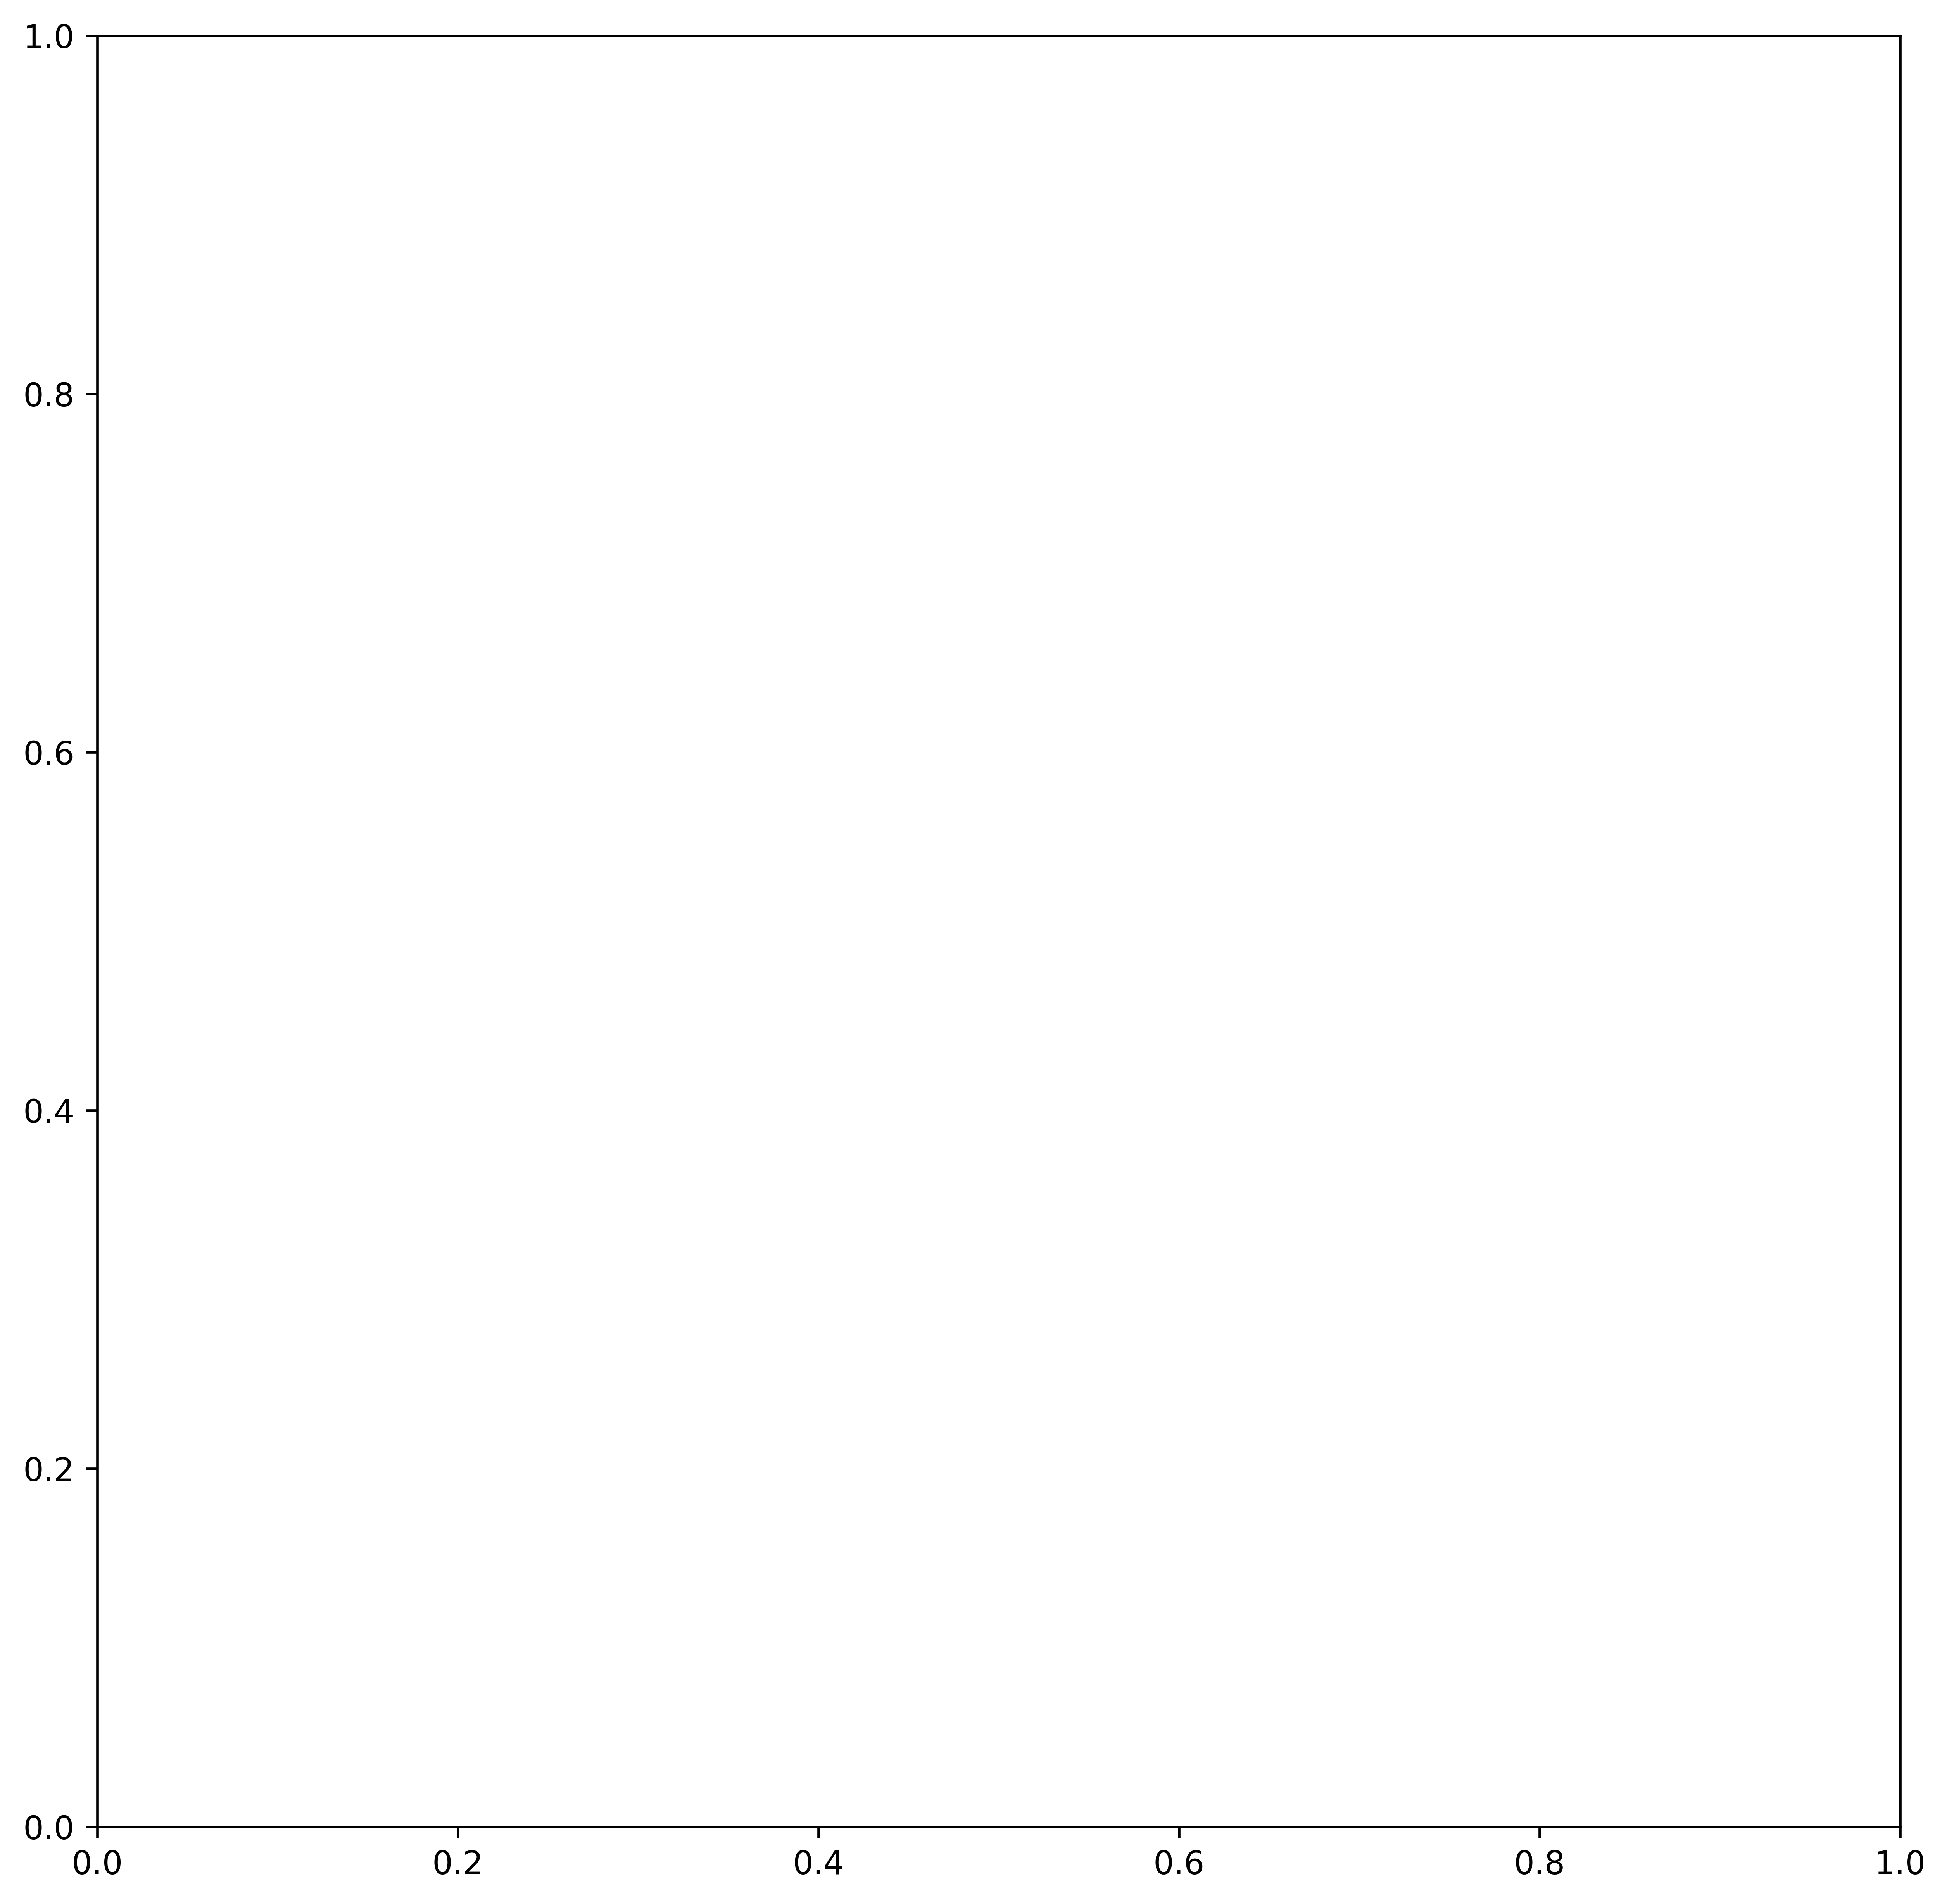

In [23]:
fig, ax = plt.subplots(figsize=(10,10), dpi=600)

In [25]:
g = sns.heatmap((tweak_siena_pres(df)
                .set_index('President')
                .iloc[:, 2:-1]
                ), annot=True, cmap='viridis', ax=ax)

In [27]:
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha='right')

[Text(0.5, 0, 'Background'),
 Text(1.5, 0, 'Imagination'),
 Text(2.5, 0, 'Integrity'),
 Text(3.5, 0, 'Intelligence'),
 Text(4.5, 0, 'Luck'),
 Text(5.5, 0, 'Willing_to_take_risks'),
 Text(6.5, 0, 'Ability_to_compromise'),
 Text(7.5, 0, 'Executive_ability'),
 Text(8.5, 0, 'Leadership_ability'),
 Text(9.5, 0, 'Communication_ability'),
 Text(10.5, 0, 'Overall_ability'),
 Text(11.5, 0, 'Party_leadership'),
 Text(12.5, 0, 'Relations_with_Congress'),
 Text(13.5, 0, 'Court_appointments'),
 Text(14.5, 0, 'Handling_of_economy'),
 Text(15.5, 0, 'Executive_appointments'),
 Text(16.5, 0, 'Domestic_accomplishments'),
 Text(17.5, 0, 'Foreign_policy_accomplishments'),
 Text(18.5, 0, 'Avoid_crucial_mistakes'),
 Text(19.5, 0, "Experts'_view"),
 Text(20.5, 0, 'Overall'),
 Text(21.5, 0, 'Average_rank')]

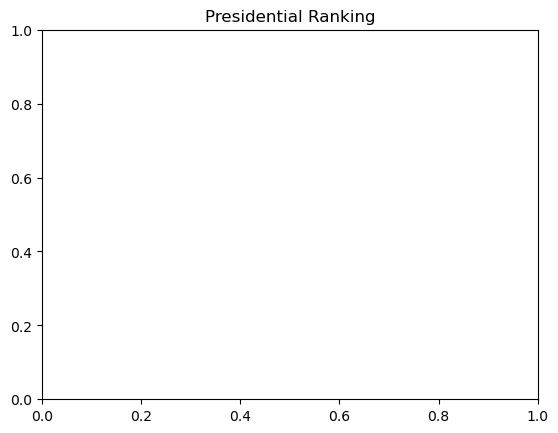

In [28]:
_ = plt.title('Presidential Ranking')

In [30]:
fig.savefig('/Users/seanphillips/Desktop/Items/Effective Pandas/Images/20-pres.png', bbox_inches='tight')

In [31]:
pres = tweak_siena_pres(df)

In [32]:
pres.head(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st


In [33]:
pres.head()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st


In [34]:
pres.sample(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
12,12,Zachary Taylor,Whig,30,26,22,32,37,24,26,...,37,27,33,27,30,26,30,30,30,3rd
36,37,Richard Nixon,Republican,16,21,43,16,36,12,30,...,32,23,28,22,16,42,38,29,28,3rd
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,39,37,37,37,37,33,37,38,39,4th


In [35]:
pres.sample(5)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
12,12,Zachary Taylor,Whig,30,26,22,32,37,24,26,...,37,27,33,27,30,26,30,30,30,3rd
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
34,35,John F. Kennedy,Democratic,14,5,31,11,31,9,8,...,12,7,6,15,17,18,12,10,10,1st
30,31,Herbert Hoover,Republican,13,35,15,13,43,37,36,...,26,44,35,39,33,40,35,36,35,4th
35,36,Lyndon B. Johnson,Democratic,15,11,34,22,25,10,9,...,8,12,8,5,40,35,17,16,16,2nd
